# **Web Scraping and Image Processing**

## **1. Importing Libraries**

In [1]:
import cv2
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

## **2. Web Scraping Turtules Image**

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}

turtule_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Carettochelys_insculpta.jpg/200px-Carettochelys_insculpta.jpg"

r = requests.get(turtule_url)
with open("Carettochelyidae_turtle.jpg", "wb") as f:
    f.write(r.content)

print("Image saved as Carettochelyidae_turtle.jpg")

Image saved as Carettochelyidae_turtle.jpg


## **3. Loading The Turtle Image**

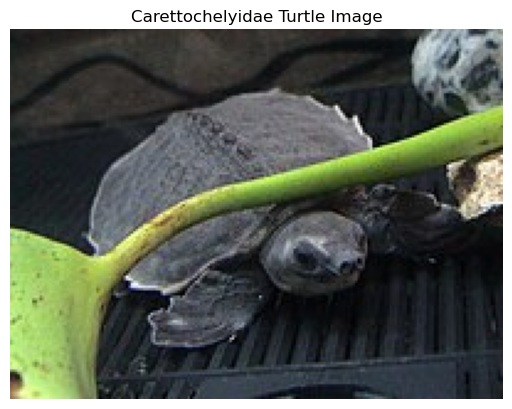

In [3]:
# Loading the image in BGR format using OpenCV.
turtle_image_bgr =cv2.imread("C:/Users/bbuser/Downloads/Carettochelyidae_turtle.jpg")

# Converting BGR to RGB for correct color display in matplotlib.
turtle_image_rgb = cv2.cvtColor(turtle_image_bgr, cv2.COLOR_BGR2RGB)

# Displaying the image.
plt.imshow(turtle_image_rgb) # Showing RGB image.
plt.title("Carettochelyidae Turtle Image")  # Adding a title.
plt.axis("off")  # Hiding the axes.
plt.show()  # Displaying the image.

## **4. Creating and Displaying Histograms**

### **Red Histogram**

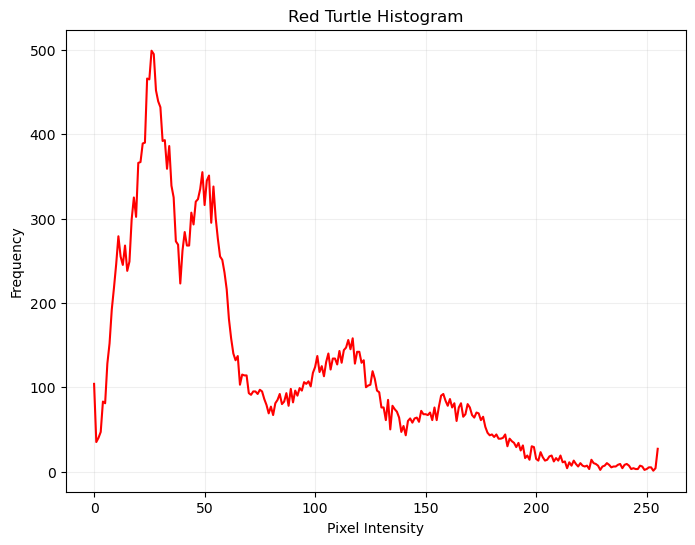

In [4]:
# Histogram for Red Channel.

plt.figure(figsize=(8,6)) # To specify the size of the image.
red_turtle_hist = cv2.calcHist([turtle_image_rgb], [0], None, [256], [0, 256]) # Calculate histogram for red channel
plt.plot(red_turtle_hist, color="red") # Ploting in red
plt.title("Red Turtle Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()

### **Green Histogram**

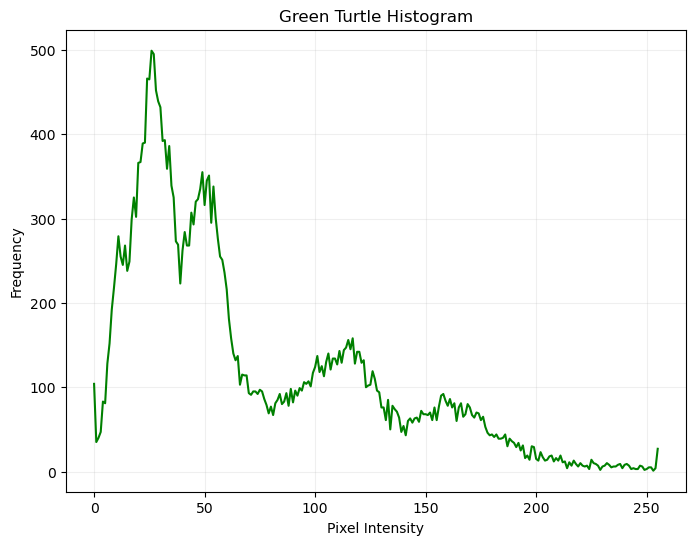

In [5]:
# Histogram for Green Channel.

plt.figure(figsize=(8,6)) # To specify the size of the image.
green_turtle_hist = cv2.calcHist([turtle_image_rgb], [0], None, [256], [0, 256]) # Calculate histogram for green channel
plt.plot(green_turtle_hist, color="green") # Ploting in green
plt.title("Green Turtle Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()

### **Blue Histogram**

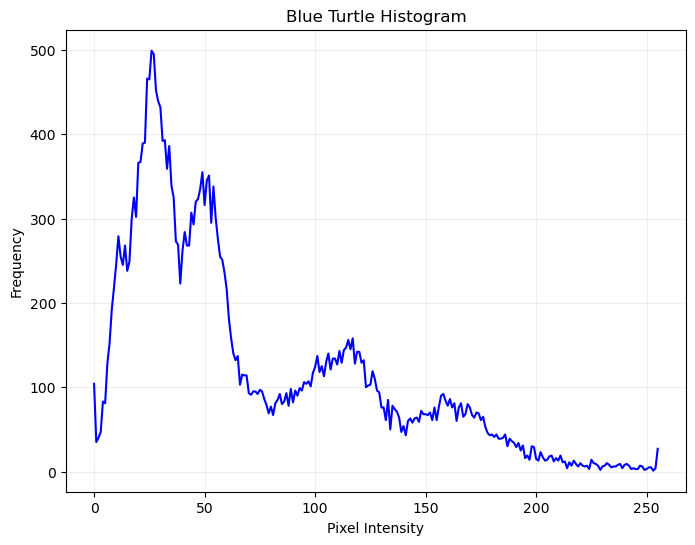

In [6]:
# Histogram for Blue Channel.

plt.figure(figsize=(8,6)) # To specify the size of the image.
blue_turtle_hist = cv2.calcHist([turtle_image_rgb], [0], None, [256], [0, 256]) # Calculate histogram for blue channel
plt.plot(blue_turtle_hist, color="blue") # Ploting in blue
plt.title("Blue Turtle Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()

### **Combined Histogram**

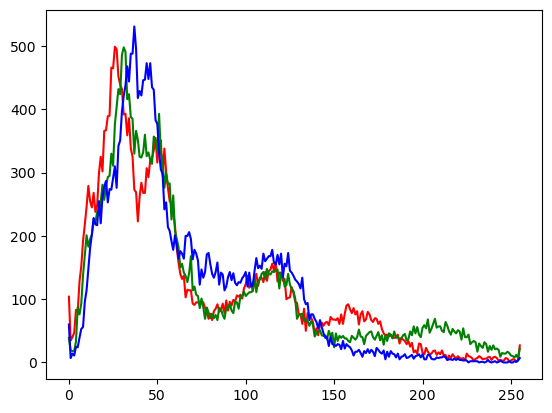

In [7]:
colors = ("red", "green", "blue")
for channel_index, color in enumerate(colors):
    hist = cv2.calcHist([turtle_image_rgb], [channel_index], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f"{color.capitalize()} channel")

## **5. Apply Intensity Transformation**

### **A. Negative Image**

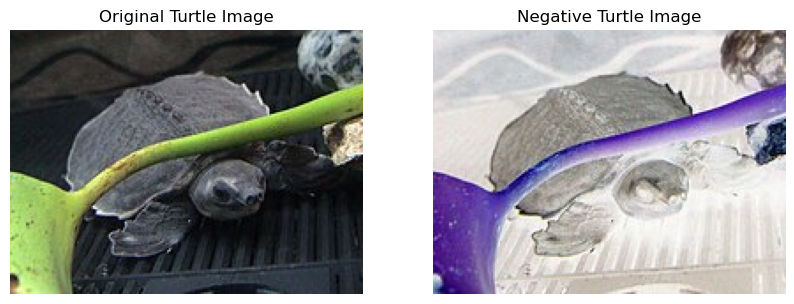

In [8]:
# Invert pixel values (creates photo negative)
negative_turtle_image = 255 - turtle_image_rgb

# Show original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(turtle_image_rgb)
plt.title("Original Turtle Image")
plt.axis('off')

# Show negative image
plt.subplot(1, 2, 2)
plt.imshow(negative_turtle_image)
plt.title("Negative Turtle Image")
plt.axis('off')
plt.show()

### **B. Brightness & Contrast**

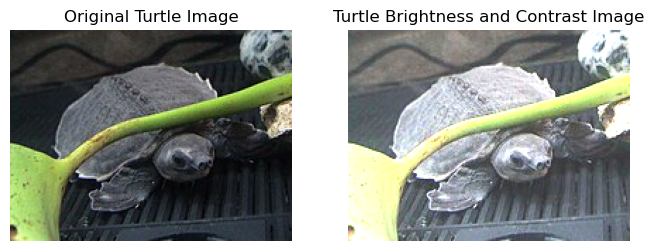

In [9]:
alpha = 1.5  # Contrast control (1.0 = no change)
beta = 50    # Brightness control (0 = no change)

# Apply transformation using OpenCV (scales, clips, and converts image)
turtle_bright_contrast_image = cv2.convertScaleAbs(turtle_image_rgb, alpha=alpha, beta=beta)

# Show before and after adjustments
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(turtle_image_rgb)
plt.title("Original Turtle Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(turtle_bright_contrast_image)
plt.title("Turtle Brightness and Contrast Image")
plt.axis('off')
plt.show()

## **6. Histogram Equalization**

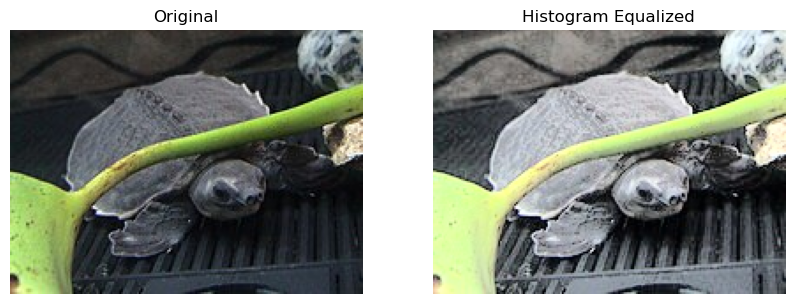

In [10]:
# Convert RGB image to YCrCb (luma + color difference channels)
turtle_image_ycrcb = cv2.cvtColor(turtle_image_rgb, cv2.COLOR_RGB2YCrCb)

# Split channels: Y = brightness (luma), Cr & Cb = color
y, cr, cb = cv2.split(turtle_image_ycrcb)

# Equalize only the Y channel (brightness)
y_eq = cv2.equalizeHist(y)

# Merge the modified Y back with original Cr and Cb
turtle_image_ycrcb_eq = cv2.merge((y_eq, cr, cb))

# Convert back to RGB to display result
turtle_image_eq = cv2.cvtColor(turtle_image_ycrcb_eq, cv2.COLOR_YCrCb2RGB)

# Show the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(turtle_image_rgb)
plt.title("Original")
plt.axis('off')

# show the equalized image
plt.subplot(1, 2, 2)
plt.imshow(turtle_image_eq)
plt.title("Histogram Equalized")
plt.axis('off')
plt.show()

## **7. Thresholding and Segmentation**

### **A. Convert The Image to Grayscale**

C:\Users\bbuser\AppData\Local\Temp\ipykernel_8604\578581058.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_turtle_image.ravel(), 256, [0, 256], color='gray') # Flatten image to 1D for histogram


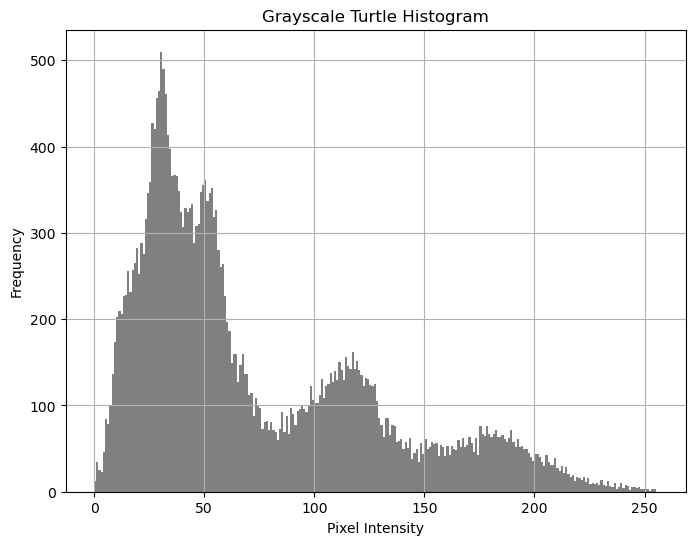

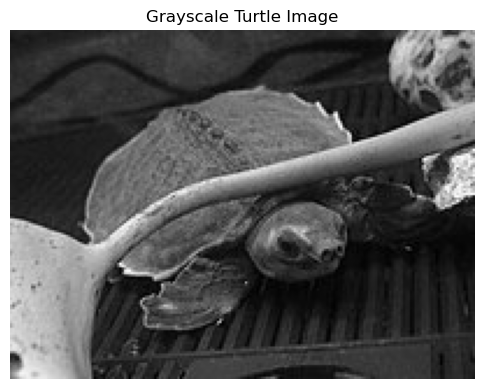

In [11]:
# Convert RGB to Grayscale
gray_turtle_image = cv2.cvtColor(turtle_image_rgb, cv2.COLOR_RGB2GRAY)

# Plot histogram of grayscale image
plt.figure(figsize=(8, 6))
plt.hist(gray_turtle_image.ravel(), 256, [0, 256], color='gray') # Flatten image to 1D for histogram
plt.title("Grayscale Turtle Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Display grayscale image
plt.figure(figsize=(6,6))
plt.imshow(gray_turtle_image, cmap='gray') # cmap='gray' ensures grayscale display
plt.title("Grayscale Turtle Image")
plt.axis('off')
plt.show()

### **B. Apply Otsu’s Thresholding**

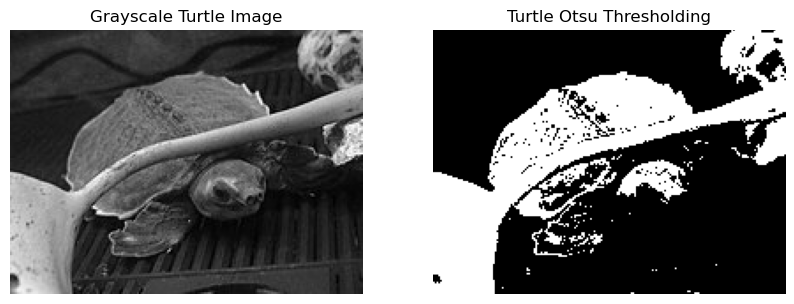

In [12]:
# Apply Otsu's automatic thresholding
_, turtle_otsu_image = cv2.threshold(gray_turtle_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show original grayscale image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_turtle_image, cmap='gray')
plt.title("Grayscale Turtle Image")
plt.axis('off')

# show the thresholded image
plt.subplot(1, 2, 2)
plt.imshow(turtle_otsu_image, cmap='gray')
plt.title("Turtle Otsu Thresholding")
plt.axis('off')
plt.show()